<a href="https://colab.research.google.com/github/ownit4137/TIL/blob/main/TIL/DLCV/RCNN/210225_ObjDt_OpenCV_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
%cd /content/drive/MyDrive/Colab Notebooks/DLCV_inflearn/DLCV/data
!ls

/content/drive/MyDrive/Colab Notebooks/DLCV_inflearn/DLCV/data
image  output  util  video


In [29]:
import cv2
import matplotlib.pyplot as plt
import time

(633, 806, 3)


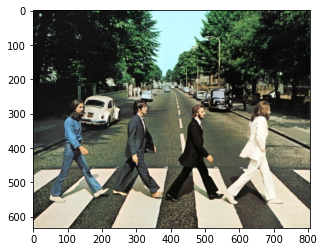

In [7]:
img = cv2.imread('./image/beatles01.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print(img.shape)
plt.imshow(img_rgb)

In [9]:
%cd /content/drive/MyDrive/Colab Notebooks/DLCV_inflearn
!ls

# !wget http://download.tensorflow.org/models/object_detection/faster_rcnn_resnet50_coco_2018_01_28.tar.gz
# !tar -xvf faster*
# !rm faster_rcnn_resnet50_coco_2018_01_28.tar.gz

/content/drive/MyDrive/Colab Notebooks/DLCV_inflearn
210130_DLCV_envset		       210130_OD_Evaluation
210130_ObjectDetection_overview.ipynb  210130_SelectiveSearch_IOU
210130_OD_Datasets		       DLCV
--2021-02-25 08:06:02--  http://download.tensorflow.org/models/object_detection/faster_rcnn_resnet50_coco_2018_01_28.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.137.128, 2607:f8b0:4023:c03::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.137.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 381355771 (364M) [application/x-tar]
Saving to: ‘faster_rcnn_resnet50_coco_2018_01_28.tar.gz’

faster_rcnn_resnet5 100%[===================>] 363.69M  66.6MB/s    in 6.1s    

2021-02-25 08:06:09 (60.1 MB/s) - ‘faster_rcnn_resnet50_coco_2018_01_28.tar.gz’ saved [381355771/381355771]



In [12]:
%cd /content/drive/MyDrive/Colab Notebooks/DLCV_inflearn/faster_rcnn_resnet50_coco_2018_01_28
!ls


!wget https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/faster_rcnn_resnet50_coco_2018_01_28.pbtxt
!mv faster_rcnn_resnet50_coco_2018_01_28.pbtxt graph.pbtxt

/content/drive/MyDrive/Colab Notebooks/DLCV_inflearn/faster_rcnn_resnet50_coco_2018_01_28
checkpoint			model.ckpt.index  saved_model
frozen_inference_graph.pb	model.ckpt.meta
model.ckpt.data-00000-of-00001	pipeline.config
--2021-02-25 08:13:19--  https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/faster_rcnn_resnet50_coco_2018_01_28.pbtxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 90893 (89K) [text/plain]
Saving to: ‘faster_rcnn_resnet50_coco_2018_01_28.pbtxt’

faster_rcnn_resnet5 100%[===================>]  88.76K  --.-KB/s    in 0.01s   

2021-02-25 08:13:19 (5.85 MB/s) - ‘faster_rcnn_resnet50_coco_2018_01_28.pbtxt’ saved [90893/90893]



In [13]:
cv_net = cv2.dnn.readNetFromTensorflow('frozen_inference_graph.pb', 'graph.pbtxt')

In [18]:
labels_to_names_seq = {0:'person',1:'bicycle',2:'car',3:'motorbike',4:'aeroplane',5:'bus',6:'train',7:'truck',8:'boat',9:'traffic light',10:'fire hydrant',
                        11:'stop sign',12:'parking meter',13:'bench',14:'bird',15:'cat',16:'dog',17:'horse',18:'sheep',19:'cow',20:'elephant',
                        21:'bear',22:'zebra',23:'giraffe',24:'backpack',25:'umbrella',26:'handbag',27:'tie',28:'suitcase',29:'frisbee',30:'skis',
                        31:'snowboard',32:'sports ball',33:'kite',34:'baseball bat',35:'baseball glove',36:'skateboard',37:'surfboard',38:'tennis racket',39:'bottle',40:'wine glass',
                        41:'cup',42:'fork',43:'knife',44:'spoon',45:'bowl',46:'banana',47:'apple',48:'sandwich',49:'orange',50:'broccoli',
                        51:'carrot',52:'hot dog',53:'pizza',54:'donut',55:'cake',56:'chair',57:'sofa',58:'pottedplant',59:'bed',60:'diningtable',
                        61:'toilet',62:'tvmonitor',63:'laptop',64:'mouse',65:'remote',66:'keyboard',67:'cell phone',68:'microwave',69:'oven',70:'toaster',
                        71:'sink',72:'refrigerator',73:'book',74:'clock',75:'vase',76:'scissors',77:'teddy bear',78:'hair drier',79:'toothbrush' }
labels_to_names_0 = {0:'person',1:'bicycle',2:'car',3:'motorcycle',4:'airplane',5:'bus',6:'train',7:'truck',8:'boat',9:'traffic light',
                    10:'fire hydrant',11:'street sign',12:'stop sign',13:'parking meter',14:'bench',15:'bird',16:'cat',17:'dog',18:'horse',19:'sheep',
                    20:'cow',21:'elephant',22:'bear',23:'zebra',24:'giraffe',25:'hat',26:'backpack',27:'umbrella',28:'shoe',29:'eye glasses',
                    30:'handbag',31:'tie',32:'suitcase',33:'frisbee',34:'skis',35:'snowboard',36:'sports ball',37:'kite',38:'baseball bat',39:'baseball glove',
                    40:'skateboard',41:'surfboard',42:'tennis racket',43:'bottle',44:'plate',45:'wine glass',46:'cup',47:'fork',48:'knife',49:'spoon',
                    50:'bowl',51:'banana',52:'apple',53:'sandwich',54:'orange',55:'broccoli',56:'carrot',57:'hot dog',58:'pizza',59:'donut',
                    60:'cake',61:'chair',62:'couch',63:'potted plant',64:'bed',65:'mirror',66:'dining table',67:'window',68:'desk',69:'toilet',
                    70:'door',71:'tv',72:'laptop',73:'mouse',74:'remote',75:'keyboard',76:'cell phone',77:'microwave',78:'oven',79:'toaster',
                    80:'sink',81:'refrigerator',82:'blender',83:'book',84:'clock',85:'vase',86:'scissors',87:'teddy bear',88:'hair drier',89:'toothbrush',
                    90:'hair brush'}
labels_to_names = {1:'person',2:'bicycle',3:'car',4:'motorcycle',5:'airplane',6:'bus',7:'train',8:'truck',9:'boat',10:'traffic light',
                    11:'fire hydrant',12:'street sign',13:'stop sign',14:'parking meter',15:'bench',16:'bird',17:'cat',18:'dog',19:'horse',20:'sheep',
                    21:'cow',22:'elephant',23:'bear',24:'zebra',25:'giraffe',26:'hat',27:'backpack',28:'umbrella',29:'shoe',30:'eye glasses',
                    31:'handbag',32:'tie',33:'suitcase',34:'frisbee',35:'skis',36:'snowboard',37:'sports ball',38:'kite',39:'baseball bat',40:'baseball glove',
                    41:'skateboard',42:'surfboard',43:'tennis racket',44:'bottle',45:'plate',46:'wine glass',47:'cup',48:'fork',49:'knife',50:'spoon',
                    51:'bowl',52:'banana',53:'apple',54:'sandwich',55:'orange',56:'broccoli',57:'carrot',58:'hot dog',59:'pizza',60:'donut',
                    61:'cake',62:'chair',63:'couch',64:'potted plant',65:'bed',66:'mirror',67:'dining table',68:'window',69:'desk',70:'toilet',
                    71:'door',72:'tv',73:'laptop',74:'mouse',75:'remote',76:'keyboard',77:'cell phone',78:'microwave',79:'oven',80:'toaster',
                    81:'sink',82:'refrigerator',83:'blender',84:'book',85:'clock',86:'vase',87:'scissors',88:'teddy bear',89:'hair drier',90:'toothbrush',
                    91:'hair brush'}

In [58]:
"""
detection (7, )
? / class / score / left / top / right / bottom
"""


def obj_detect(cv_net, img_array, score_threshold):
    rows = img_array.shape[0]
    cols = img_array.shape[1]
    draw_img = img_array.copy()
    
    cv_net.setInput(cv2.dnn.blobFromImage(img_array, swapRB=True, crop=False))
    
    start = time.time()
    cv_out = cv_net.forward()
    
    green_color=(0, 255, 0)
    red_color=(0, 0, 255)

    # detected obj
    for detection in cv_out[0,0,:,:]:
        score = float(detection[2])
        class_id = int(detection[1])
        
        # obj caption & draw
        if score > score_threshold:
            left = detection[3] * cols
            top = detection[4] * rows
            right = detection[5] * cols
            bottom = detection[6] * rows
            
            # caption = "{}: {:.4f}".format(labels_to_names_0[class_id], score)
            # print(caption)
    
            cv2.rectangle(draw_img, (int(left), int(top)), (int(right), int(bottom)), color=green_color, thickness=2)
            cv2.putText(draw_img, caption, (int(left), int(top - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, red_color, 1)

    print('Detection 수행시간:',round(time.time() - start, 2),"초")
    return draw_img

In [42]:
bt_img = cv2.imread('./image/beatles01.jpg')
bt_img = cv2.cvtColor(bt_img, cv2.COLOR_BGR2RGB)
bs_img = cv2.imread('./image/baseball01.jpg')
bs_img = cv2.cvtColor(bs_img, cv2.COLOR_BGR2RGB)

person: 0.9997
person: 0.9987
person: 0.9977
person: 0.9974
person: 0.8727
car: 0.8616
car: 0.8458
car: 0.7073
car: 0.6420
car: 0.6360
car: 0.5531
car: 0.5505
truck: 0.6225
remote: 0.6938
Detection 수행시간: 7.79 초


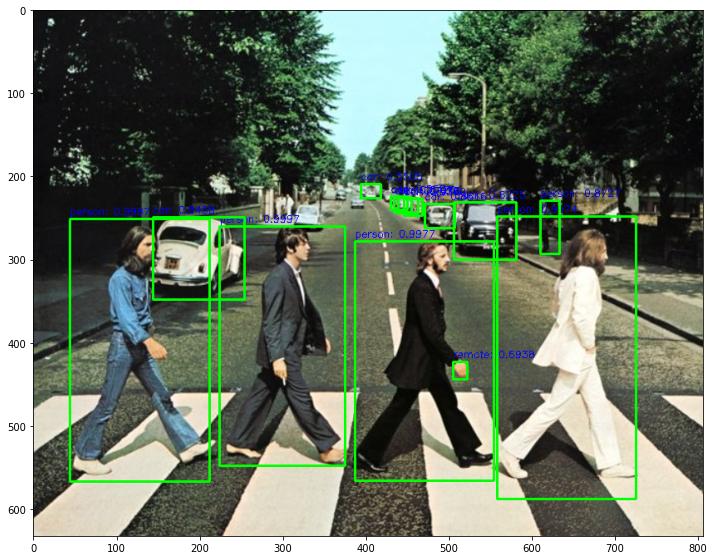

In [43]:
bt_draw_img = obj_detect(cv_net, bt_img, score_threshold=0.5)
plt.figure(figsize=(12, 12))
plt.imshow(bt_draw_img)

person: 0.9998
person: 0.9997
person: 0.9966
sports ball: 0.8146
baseball glove: 0.9880
Detection 수행시간: 6.98 초


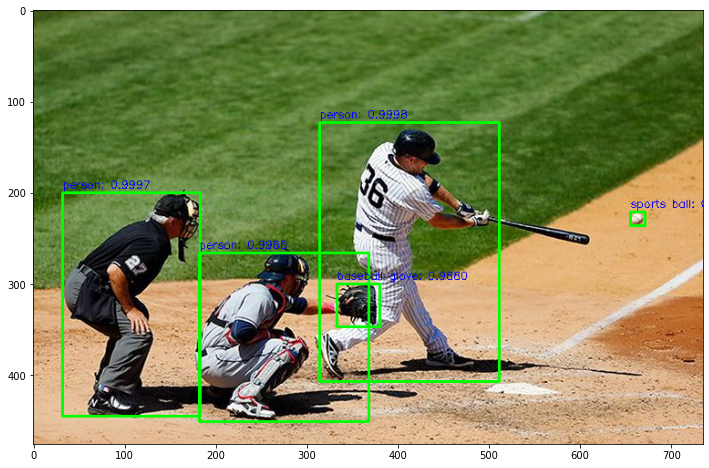

In [46]:
bs_draw_img = obj_detect(cv_net, bs_img, score_threshold=0.5)
plt.figure(figsize=(12, 12))
plt.imshow(bs_draw_img)

In [48]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('/content/drive/MyDrive/Colab Notebooks/DLCV_inflearn/DLCV/data/video/John_Wick_small.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=800 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [61]:
import os

default_dir = '/content/DLCV'

video_input_path = '/content/drive/MyDrive/Colab Notebooks/DLCV_inflearn/DLCV/data/video/John_Wick_small.mp4'
video_output_path = '/content/drive/MyDrive/Colab Notebooks/DLCV_inflearn/DLCV/data/video/John_Wick_small_cv01.avi'

cap = cv2.VideoCapture(video_input_path)

codec = cv2.VideoWriter_fourcc(*'XVID')

vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))) 
vid_fps = cap.get(cv2.CAP_PROP_FPS )
    
vid_writer = cv2.VideoWriter(video_output_path, codec, vid_fps, vid_size) 

frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print('총 Frame 갯수:', frame_cnt)

총 Frame 갯수: 58


In [62]:
i = 0
while True:
    hasFrame, img_frame = cap.read()
    if not hasFrame:
        print('더 이상 처리할 frame이 없습니다.')
        break

    print(i, "번째 frame ", end='')
    i += 1
    img_frame = obj_detect(cv_net, img_frame, 0.5)
    vid_writer.write(img_frame)

vid_writer.release()
cap.release()

0 번째 frame Detection 수행시간: 7.72 초
1 번째 frame Detection 수행시간: 7.69 초
2 번째 frame Detection 수행시간: 7.72 초
3 번째 frame Detection 수행시간: 7.67 초
4 번째 frame Detection 수행시간: 7.69 초
5 번째 frame Detection 수행시간: 7.67 초
6 번째 frame Detection 수행시간: 7.67 초
7 번째 frame Detection 수행시간: 7.65 초
8 번째 frame Detection 수행시간: 7.63 초
9 번째 frame Detection 수행시간: 7.69 초
10 번째 frame Detection 수행시간: 7.67 초
11 번째 frame Detection 수행시간: 7.68 초
12 번째 frame Detection 수행시간: 7.63 초
13 번째 frame Detection 수행시간: 7.66 초
14 번째 frame Detection 수행시간: 7.68 초
15 번째 frame Detection 수행시간: 7.77 초
16 번째 frame Detection 수행시간: 7.66 초
17 번째 frame Detection 수행시간: 7.73 초
18 번째 frame Detection 수행시간: 7.7 초
19 번째 frame Detection 수행시간: 8.01 초
20 번째 frame Detection 수행시간: 7.78 초
21 번째 frame Detection 수행시간: 7.88 초
22 번째 frame Detection 수행시간: 7.73 초
23 번째 frame Detection 수행시간: 7.73 초
24 번째 frame Detection 수행시간: 7.65 초
25 번째 frame Detection 수행시간: 7.7 초
26 번째 frame Detection 수행시간: 7.68 초
27 번째 frame Detection 수행시간: 7.65 초
28 번째 frame Detection 수행시간: 7.69